# Project Telco

## Overview and Goals
* I aimed to research what drives customers to churn and identify key factors contributing to customer attrition.
* Utilized these drivers to develop a machine learning model that accurately predicts churn, enabling proactive strategies to retain valuable customers and reduce business losses.

## Imports

In [1]:
#imported custom modules
import wrangle as w
import explore as e
import model as m

## Acquisition
* Data acquired from Codeup MySQL Database
* Data initially acquired on 16 Aug 2023
* It contained 7,043 rows and 21 columns before cleaning
* Each row represents a unique customer of Telco
* Each column represents an element of the customer account

## Preparation
In the data preparation phase, we performed the following steps:
* The initial dataframe had extraneaous columns not required so they were removed.
* Checked for nulls in the data
    * total_charges nulls matched tenure of 0, I calculated mean and filled in nulls.
    * Checked that column data types were appropriate
* Encoded categorical variables
    * imputed total_charges with the mean value
    * imputed internet service types that had none as string
* Created dummy variables for other categorical variables
    * Produced dummmies for categorical data
    * filled in internet_service_types 'None' values with the mode of column, 'Fiber Optic'.
    * Dropped no generated columns and ended up with a total of 26 columns 
* Split data into train, validate and test (approx. 56/24/20), stratifying on 'churn'
* Outliers were removed for this iteration of the project
* Created a module named wrangle that holds both preparation and acquisition preprocessing.

In [2]:
# acquire, clean, prepare, and split the data
train, val, test = w.wrangle_telco()

In [3]:
#A quick look at the data
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender,partner,dependents,phone,multiple_lines,...,churn,dsl,fiber_optic,month_to_month,one_year,two_year,bank_transfer_payment,credit_card_payment,electronic_payment,mailed_payment
4604,6490-FGZAT,0,6,20.65,109.30,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
4051,5707-ORNDZ,1,9,54.55,494.05,1,0,0,1,1,...,1,1,0,1,0,0,0,0,1,0
5159,7252-NTGSS,0,1,45.15,45.15,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
2974,4250-WAROZ,1,60,93.25,5774.55,1,1,1,1,1,...,0,0,1,1,0,0,0,0,1,0
2979,4257-GAESD,0,6,45.00,298.70,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


## Target Variable Context
To understand the context of the target variable, let's start by visualizing its distribution:

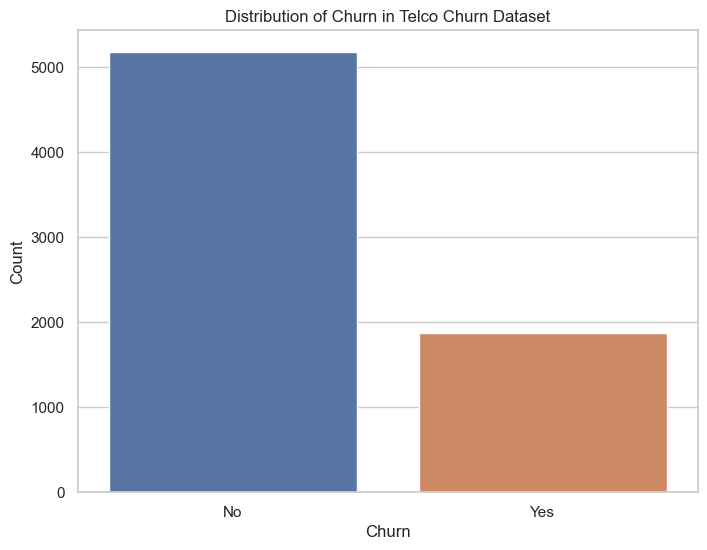

In [4]:
# countplot of target variable distribution
e.plot_tvd(train)

## Exploration
 
* Is Churn independent from senior citizen status?
* Is Churn independent from online security service?
* Is Churn independent of Telco phone service?
* Is there linear correlation between tenure and total charges?

### Question 1: Is Churn independent from senior citizen status?
**Null Hypotesis ($H0$):** Churn **IS independent** from senior citizen status.

**Alternative Hypotesis ($Ha$):** Churn **IS NOT independent** from senior citizen status

Churn is NOT independent from payment type

-------------------------
Chi2 Statistic: 91.99974913551424

P-Value: 8.66874699390739e-22



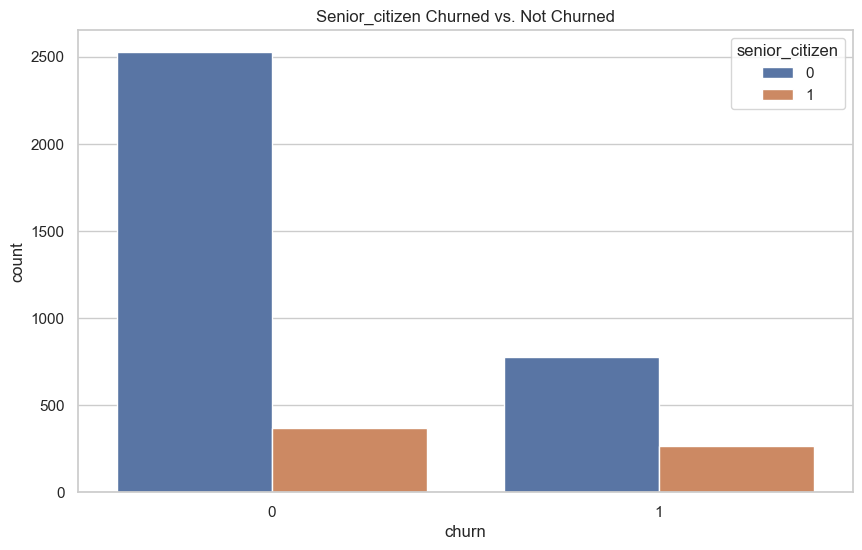


We reject the null hypothesis with a p-value of 0.0.
-------------------------


In [5]:
# senior_citizen vs churn; function call
e.chi2_and_visualize(train, 'senior_citizen', 'churn')

### Answer/Takeaway
* Churn IS NOT independent from senior citizen status
####  Being a senior citizen does not make a customer more or less likely to churn.

### Question 2: Is Churn independent from online security service?

**Null Hypotesis ($H0$):** Churn **IS independent** from Online security service.

**Alternative Hypotesis ($Ha$):** Churn **IS NOT independent** from Online security service.

-------------------------
Chi2 Statistic: 109.40634009015375

P-Value: 1.3220602018928545e-25



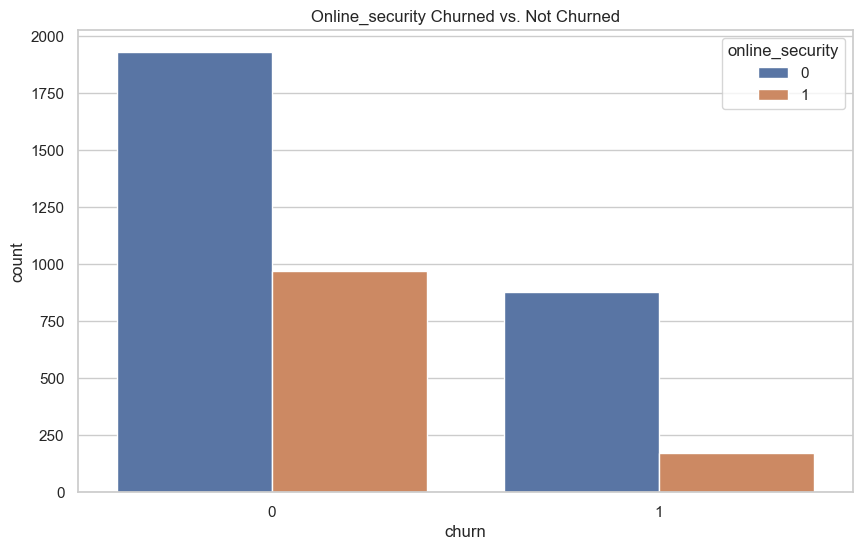


We reject the null hypothesis with a p-value of 0.0.
-------------------------


In [6]:
# online_security vs churn; function call
e.chi2_and_visualize(train, 'online_security', 'churn')

### Answer/Takeaway
* Churn IS NOT independent from Online security service.
#### Having or not having online security add on service does not make a customer more or less likely to churn.

### Question 3: Is Churn independent of Telco phone service?

**Null Hypotesis ($H0$):** Telco phone service type **IS independent** from churn.

**Alternative Hypotesis ($Ha$):** Telco phone service type **IS NOT independent** from churn.

-------------------------
Chi2 Statistic: 0.4338671508044712

P-Value: 0.5100974716264193



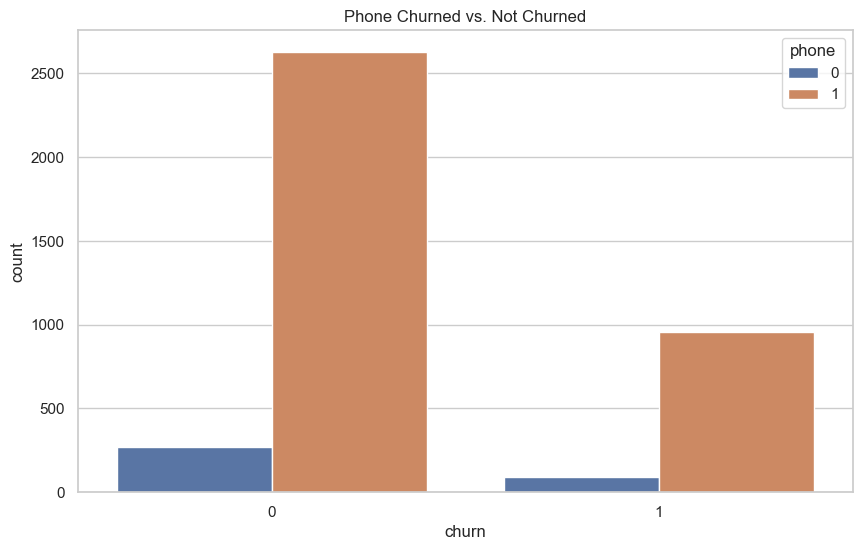


We failed to reject the null hypothesis with a p-value of 0.51.
-------------------------


In [7]:
# phonw vs churn; function call
e.chi2_and_visualize(train, 'phone', 'churn')

#### Answer/Takeaway
* Telco phone service type IS NOT independent from churn.
 ##### Having or not having internet service service of any type does not make a customer more or less likely to churn.
 ##### **I did however find that a customer having phone service does affect the probability of a customer more  or less like to churn.**

## Question 4: Is there linear correlation between tenure and total charges?

**Null Hypotesis ($H0$):** There **IS** a linear correlation between tenure and total charges.

**Alternative Hypotesis ($Ha$):** There is **NOT** a linear correlation between tenure and total charges.

Spearman's r: 0.30

This suggests a moderate positive correlation between variables. As monthly charges increase, tenure tends to increase.
This does not mean there is a strong relationship. They are moderately associated.



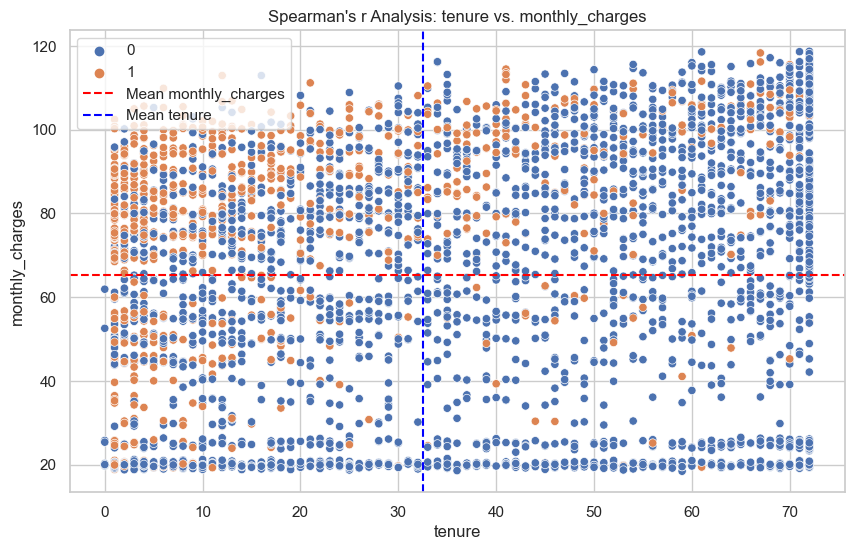


We Reject the null hypothesis. There is a linear correlation (p-value: 0.00)


In [8]:
# tenure and monthly charges exploration
e.spearman_r_analysis(train, 'tenure', 'monthly_charges')

### Answers/Takeaways:
* There IS a linear correlation between tenure and total charges.
#### This suggests a moderate positive correlation between variables. As monthly charges increase, tenure tends to increase.
#### This does not mean there is a strong relationship. They are moderately associated.

## Exploration Conclusion Takeaway:

- I did not find any drivers of churn in 3 out of 4 tests

- based of my findings in exploration a customer having phone service does affect the probability of a customer more or less likely to churn.

- It does make sense to combine some features that were very few in respective columns

- I think it was surprising that phone service was dependent on churn and we failed to reject the null hypothesis.

## Features for modeling
* Features that will be used:
    * churn (target)
* Some features that may be useful:
    * payment type
    * Phone service 
    * paperless billing
    * monthly charges

## Modeling

* Accuracy will be the evaluation metric
    * Given more time I can evaluate with additional hyperparameter configurations giving other metric evaluations. 
* Target feature is Churn
    * 27% Churn
    * 73% Active
Guessing Active for every customer gives an accuracy of 73%
    * 73% will be the baseline accuracy
* Models will be developed and evaluated using 4 different model types and various features.
    * Decision Tree
    * Random Forest
    * KNN
    * Logistic Regression
* Models will be evaluated on train and validate datasets
  * Best performing model will be the only one evaluated on the test dataset

In [9]:
# established baseline for models
e.baseline(train['churn'])

Baseline: 73.47% Accuracy


## Best Models

### **Model 1: Decision Tree**

#### Steps:
- Data preprocessing
- Model fitting
- Model evaluation

In [10]:
# decision tree model visual and metric evaluations
m.train_and_evaluate_model(train, val, test, target_col='churn')


Accuracy of Decision Tree classifier on training set: 78.85

Accuracy of Decision Tree classifier on validation set: 76.94

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2897
           1       0.73      0.32      0.45      1046

    accuracy                           0.79      3943
   macro avg       0.76      0.64      0.66      3943
weighted avg       0.78      0.79      0.76      3943



(DecisionTreeClassifier(max_depth=3, random_state=42),
       Metric  Value
 0   Accuracy  78.85
 1     Recall  32.12
 2  Precision  73.04
 3   F1-Score  44.62)

### **Model 2: KNN with scaled features**

#### Steps:
- Data preprocessing
- Model fitting
- Model evaluation

In [11]:
# knn model and eval metric
m.evaluate_knn_classifier()

Training Accuracy: 0.81
Validation Accuracy: 0.78

Confusion Matrix:
           No Churn  Churn
Not Churn      1110    132
Churn           248    201

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1242
           1       0.60      0.45      0.51       449

    accuracy                           0.78      1691
   macro avg       0.71      0.67      0.68      1691
weighted avg       0.76      0.78      0.76      1691



### **Model 3: GridSearchCV Random Forest**
#### Steps:
- Data preprocessing
- Model fitting
- Model evaluation

In [12]:
# Load and preprocess data for model
train, val, test = w.wrangle_telco()

# random forest model and metric evals
m.train_evaluate_rf_with_grid_search(train, val)

Accuracy of Random Forest classifier on training set: 82.48%

Accuracy of Random Forest classifier on validation set: 78.36%

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1242
           1       0.63      0.45      0.52       449

    accuracy                           0.78      1691
   macro avg       0.72      0.68      0.69      1691
weighted avg       0.77      0.78      0.77      1691

Best Score: 81.79%


(RandomForestClassifier(max_depth=5, random_state=42),
 RandomForestClassifier(max_depth=7, random_state=42))

### **Model 4: Linear Regression**
#### Steps:
- Data preprocessing
- Model fitting
- Model evaluation

In [13]:
# a log reg function for eval metrics
m.evaluate_logistic_regression(train, val)


Logistic Regression using all features.

Accuracy of Logistic Regression classifier on training set: 81.69%

Logistic Regression using all features.

Accuracy of Logistic Regression classifier on validation set: 78.47%


#### Test Performance Visualization

Random Forest 

Accuracy on test: 79.28% 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



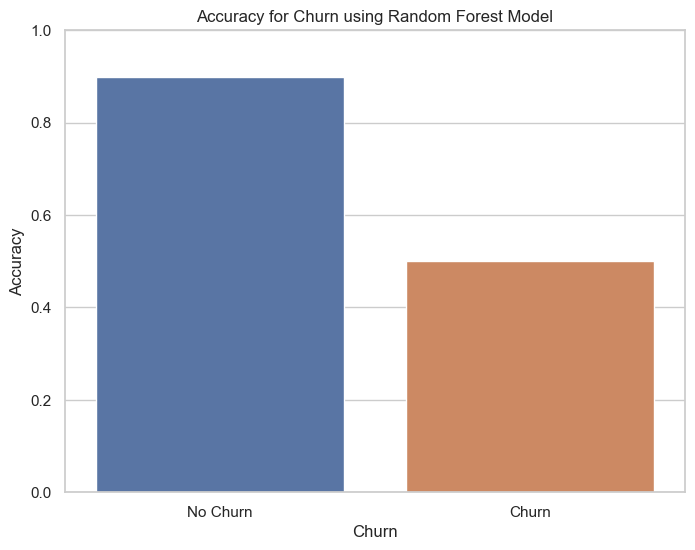

In [14]:
# Call the function to test the Random Forest model
m.test_model()

## Modeling summary

* Decision Tree and logistic regression had between 2-3.5% difference for train and validate.
* Best overall with the test done on Random Forest, we get an 79.28% accuracy.
* 79.28% is higher than our baseline of 73.47%

# Conclusion

## Takeaways and Key Findings
* Phone service was found to be a driver of churn.
* Internet service was not a driver of churn.
* Monthly charges was found to be a driver of churn, higher charges for churn.
## Recommendations
* Check with the finance department to figure out if there are issues with the phone service option.
* Check to see if multiple phone lines have a impact on churn.
## Next Steps
* Given more time I could check what is causing high churn with phone service and if there are any associations with other features.